In [414]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets.samples_generator import make_regression 
%matplotlib inline

In [465]:
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, random_state=0, noise=50)

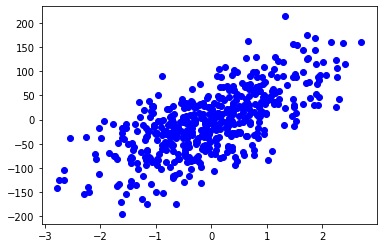

In [466]:
plt.scatter(X,y,color='blue')

In [467]:
from scipy import stats
x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)
print (intercept)
print (slope)


-3.8455448086178903
44.66098655041861


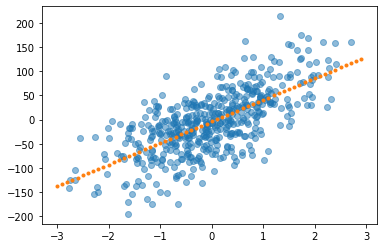

In [468]:
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

In [469]:
def cal_cost(X,y,theta):
    m = len(X)
    prediction = X.dot(theta)
    J = (1/2*m)*np.sum(np.square(prediction-y))
    return J

In [470]:
lr = .05
num_itr = 90
X_b = np.c_[np.ones((len(X), 1)), X] #Add the bias terms, shape = (500,2)
y = y.reshape(-1,1) #reshape to matrix substraction, shape = (500,1)
theta = np.random.rand(2,1) #build random theta values, shape = (2,1) 

### Batch Gradient Descent

In [471]:
def plot_curve(X,y,theta):
    plt.scatter(X[:,1],y,color='blue')
    plt.plot(X[:,1],X.dot(theta),'r')
    plt.show()

In [472]:
def batchGradient(X,y,theta,lr,num_itr):
    m = len(X)
    cost_hist = np.zeros(num_itr)
    for i in range(num_itr):
        prediction = X.dot(theta)
        theta = theta - (1 / m) * lr * (X.T.dot((prediction - y)))
        cost_hist[i] = cal_cost(X,y,theta)
        if i%30==0:
            plot_curve(X,y,theta)
            print(cost_hist[i])
    return theta,cost_hist

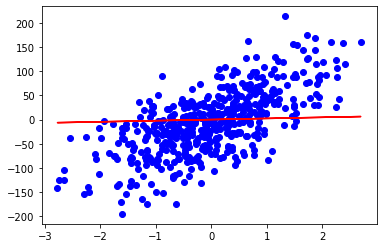

517278423.8142858


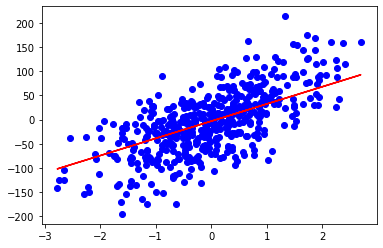

301316254.2105546


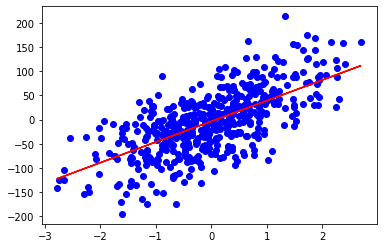

291404929.2572455
--- 0.32544970512390137 seconds ---


In [473]:
start = time.time()
w,cost = batchGradient(X_b,y,theta,lr,num_itr)
print("--- %s seconds ---" % (time.time() - start))

In [474]:
w

array([[-3.85883602],
       [44.21540308]])

Text(0.5, 0, 'Iterations')

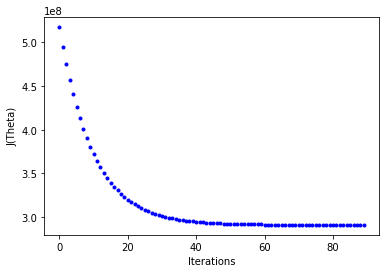

In [475]:
plt.plot(range(num_itr),cost,'b.')
plt.ylabel('J(Theta)')
plt.xlabel('Iterations')

### Stochastic Gradient Descent

In [476]:
def stochasticGradient(X,y,theta,lr,num_itr):
    m = len(X)
    costs = np.zeros(num_itr)
    for itr in range(num_itr):
        cost = 0
        for i in range(m):
            rand_ind = np.random.randint(1,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1]) # Shape = (1,2)
            y_i = y[rand_ind].reshape(1, 1) # shape = (1,1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1 / m) * lr * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        if itr%30==0:
            plot_curve(X,y,theta)
            print(cost)
        costs[itr] = cost
    return theta, costs           

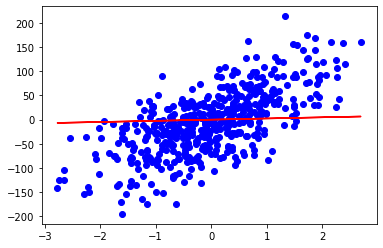

10602106.62908001


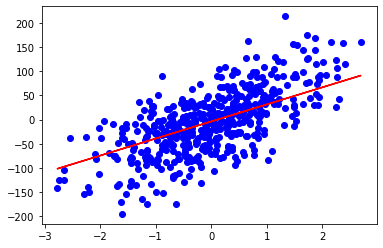

5655927614.698881


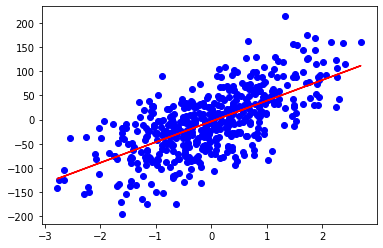

7711553726.956211
--- 1.3891489505767822 seconds ---


In [477]:
start = time.time()
w,cost = stochasticGradient(X_b,y,theta,lr,num_itr)
print("--- %s seconds ---" % (time.time() - start))

In [478]:
w

array([[-4.05957466],
       [44.28208014]])

Text(0.5, 0, 'Iterations')

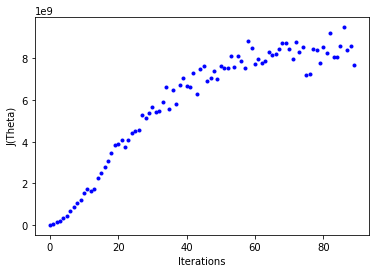

In [479]:
plt.plot(range(num_itr),cost,'b.')
plt.ylabel('J(Theta)')
plt.xlabel('Iterations')

### Mini Stochastic Gradient Descent

In [480]:
def min_stochasticGradient(X,y,theta,lr,num_itr,batch):
    m = len(X)
    costs = np.zeros(num_itr)
    for itr in range(num_itr):
        cost = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch):
            X_i = X[i:i+batch]
            y_i = y[i:i+batch]
            #print(X_i.shape)
            prediction = X_i.dot(theta)
            theta = theta - (1 / m) * lr * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(X_i, y_i,theta)
        if itr%30==0:
            plot_curve(X,y,theta)
            print(cost)
        costs[itr] = cost
    return theta,costs

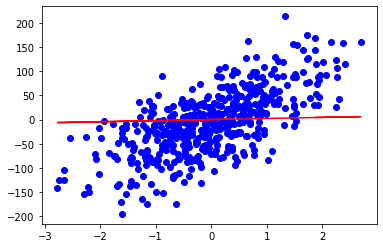

21160875.509873252


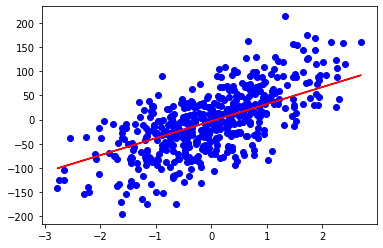

12106101.932463696


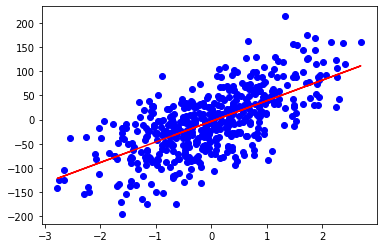

11657950.293364545
--- 0.34983277320861816 seconds ---


In [481]:
start = time.time()
batch = 20
w,cost = min_stochasticGradient(X_b,y,theta,lr,num_itr,batch)
print("--- %s seconds ---" % (time.time() - start))

In [482]:
w

array([[-3.85249343],
       [44.17372662]])

Text(0.5, 0, 'Iterations')

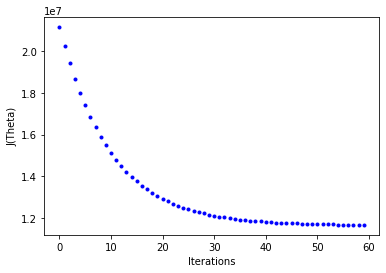

In [483]:
plt.plot(range(num_itr)[:60],cost[:60],'b.')
plt.ylabel('J(Theta)')
plt.xlabel('Iterations')